# Laboratório 6
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: O Perceptron
No Laboratório de hoje, começaremos a entrar na área mais conhecida dentro do Aprendizado de Máquina: as Redes Neurais Artificiais! Mas, antes de vermos como uma Rede Neural funciona, vamos entender do que é formada essa rede, ou seja, neurônios artificiais.

Um neurônio artificial, também denominado Perceptron, é a unidade básica das redes neurais articiais, e tem seu funcionamneto inspirado pelos neurônios em nosso cérebro. Em suma, o Perceptron multiplica cada valor de um vetor de entrada por um respectivo `peso`, somando todos junto a um `viés` (*bias*). Esse valor então é passado por uma `função de ativação` que transforma a saída para 0 ou 1, no algoritmo tradicional de classificação binária. Dessa forma, ele pode ser utilizado para fazer separações lineares nos dados.

O Perceptron, assim como outros modelos de Redes Neurais, passam por um processo chamado de treinamento, em que é feito o ajuste dos pesos e viéses de cada neurônio, com o objetivo de minimizar uma `função de perda` (*loss function*, ou somente *loss*), que define o quanto o modelo está errando na base de treinamento.

Veremos um exemplo de uso de Perceptron para a classificação na base de dados Iris, mas excluindo uma das classes para tornar em um problema binário.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Carregando o dataset Iris
iris = load_iris()

# Removendo uma das classes para simplificar o problema
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]
y = (y == 1).astype(int)  # Convertendo para um problema binário

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

Acurácia: 1.0


Como a separação entre as duas classes (setosa e virginica) é linear, o Perceptron conseguiu separá-las. Podemos ver também como foi feita essa separação, extraindo a equação da reta encontrada e exibindo um gráfico com as técnicas já aprendidas.

In [2]:
# imprimir função de decisão com os parâmetros do modelo
coef = model.coef_.ravel()
intercept = model.intercept_[0]

terms = [f"{coef[i]:+.1f} * {iris['feature_names'][i]}" for i in range(len(coef))]
equation = " ".join(terms) + f" {intercept:+.1f}"
print("Função de decisão (score bruto):")
print("f(x) =", equation)

Função de decisão (score bruto):
f(x) = -1.3 * sepal length (cm) -5.5 * sepal width (cm) +8.8 * petal length (cm) +4.1 * petal width (cm) -1.0


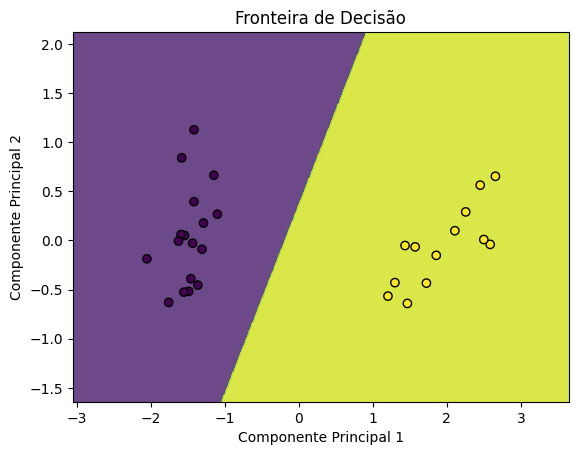

In [3]:
# Visualizando a fronteira de decisão
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test)
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_test, edgecolors='k', marker='o')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title("Fronteira de Decisão")
plt.show()

Dessa forma, conseguimos obter a equação utilissificou para 0 os elementos cujo f(x) foi negativo, e para 1, os positivos, separando linearmente o problema.

# Exemplo 2: Perceptron Multi-Camada
Assim como nosso cérebro, uma Rede Neural Artificial não é formada de apenas um neurônio, mas de uma rede deles, conectados entre si. Isso se dá através da junção de vários Perceptrons, dispostos em forma de camadas, ou *layers*, sendo a saída de um utilizada na entrada de outro. O modelo mais básico desse tipo de rede é o Perceptron Multi-Camada, ou Multi-layer Perceptron (MLP).

Essas conexões e emparalhamentos de múltiplos Perceptrons torna a MLP uma técnica muito mais robusta e complexa para resolver problemas. Veremos como podemos utilizar as MLPs para resolver alguns tipos de problemas.

## MLP para Classificação
Uma MLP pode ser utilizada para os problemas de classificação que temos estudado, podendo ser aplicada para problemas de maior número de classes e mais complexos, diferentemente do Perceptron que apenas consegue resolver problemas binários linearmente separáveis.

Para classificar os dados da base Iris em suas três classes, podemos definir a `camada de saída` da MLP como possuindo três neurônios, com cada um representando cada classe, utilizando de uma função de ativação que mantenha os valores entre 0 e 1, de forma que o maior valor indica a classe prevista para o elemento. O `MLPClassifier` do scikit-learn já define a camada de saída apartir da base de dados, nos restando definir as `camdas ocultas`, ou `hidden layers`, da MLP, que são as camadas entre a entrada e a saída. Para o treinamento desse modelo, é utilizada a `Cross Entropy` loss function, uma função de perda própria para problemas de classificação.

No exemplo a seguir, vamos definir uma MLP de apenas uma camada oculta, de 10 neurônios. Também podemos definir o máximo de iterações de treinamento da MLP, também chamadas de épocas, para que possamos indicar quando o modelo deve parar caso não ache uma solução ideal. Cada época em uma Rede Neural corresponde ao ajuste dos parâmetros para todos os elementos da base de treino.

In [4]:
from sklearn.neural_network import MLPClassifier

# Importando a base de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_mlp = mlp_model.predict(X_test)

# Avaliando o modelo MLP
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia do MLP: {accuracy_mlp}")

Acurácia do MLP: 0.9777777777777777


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# Mostrando a saída da camada de saída para uma amostra de teste
sample_index = 0
sample = X_test[sample_index].reshape(1, -1)
output = mlp_model.predict_proba(sample)
print(f"Amostra de teste {sample_index}: {sample}")
print(f"Classe verdadeira: {y_test[sample_index]}")
print(f"Saída da camada de saída para a amostra {sample_index}: {output}")
print(f"Classe prevista: {mlp_model.predict(sample)}")

Amostra de teste 0: [[6.1 2.8 4.7 1.2]]
Classe verdadeira: 1
Saída da camada de saída para a amostra 0: [[0.01130247 0.84888341 0.13981411]]
Classe prevista: [1]


## MLP para Regressão
Além dos problemas de classificação, problemas de regressão são bastante comuns em tarefas de Aprendizado de Máquina, em que os modelos tentam prever um valor em vez de uma classe. Conseguimos aplicar uma MLP para esse problema ao removermos a função de ativação da camada de saída, para que não realize transformações na saída, preservando a estrutura do valor esperado.



O `MLPRegression` do scikit-learn implementa uma MLP para regressão, utilizando o erro quadrático entre o valor previsto e esperado como função de perda. Veremos um exemplo para a base Iris, resolvendo um outro problema que não a classificação: tentar prever o tamanho da sépala a partir do tamanho da pétala!

In [24]:
from sklearn.neural_network import MLPRegressor

# Importando a base de dados Iris
iris = load_iris()
X = iris.data[:,:2]
y = iris.data[:,2:]

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Fazendo previsões
y_pred_mlp = mlp_model.predict(X_test)

# Avaliando o modelo MLP
score_mlp = mlp_model.score(X_test, y_test)
print(f"Score do MLP: {score_mlp}")

Score do MLP: 0.7088005188726992


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


O valor Score é calculado através do coeficiente de determinação da base de testes, e indica o erro do modelo de forma que o melhor possível é 1, mas pode atingir valores negativos. Assim como a acurácia, essa métrica pode nos dar uma ideia de como o modelo está prevendo, mas também podemos gerar um gráfico para visualização!

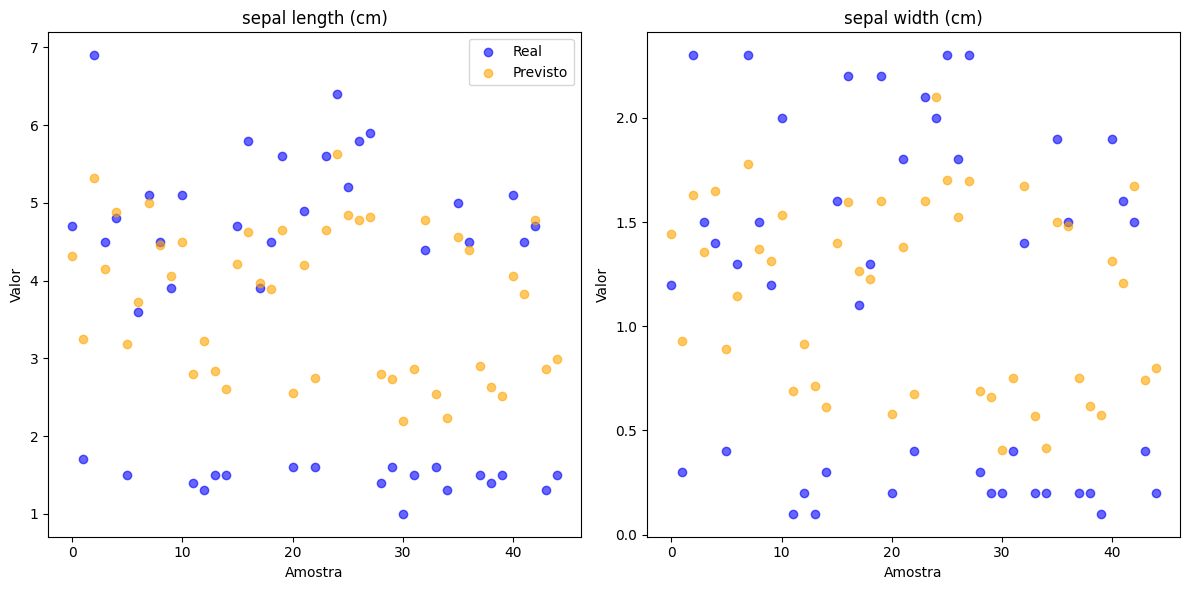

In [25]:
# Obtendo os nomes corretos das variáveis de y
y_var_names = iris.feature_names[:2]  # as últimas colunas do dataset

# Plotando um gráfico para cada variável
plt.figure(figsize=(12, 6))
for i, var_name in enumerate(y_var_names):
    plt.subplot(1, len(y_var_names), i+1)
    plt.scatter(range(len(y_test)), y_test[:, i], label="Real", color='blue', alpha=0.6)
    plt.scatter(range(len(y_pred_mlp)), y_pred_mlp[:, i], label="Previsto", color='orange', alpha=0.6)
    plt.title(var_name)
    plt.xlabel("Amostra")
    plt.ylabel("Valor")
    if i == 0:  # legenda apenas no primeiro gráfico
        plt.legend()

plt.tight_layout()
plt.show()

# Exercício!

SUA VEZ!

Vamos colocar o uso de MLPs em prática e ver seu desempenho em problemas mais complexos!
Você terá dois exercícios, um de classificação e um de regressão!

Classificação:
- Implemente um MLP para resolver o problema de classificação da base `breat_cancer` do scikit-learn.

Regressão:
- Implemente um MLP para resolver o problema de regressão da base `diabetes` do scikit-learn.

In [ ]:
# Seu código aqui

# DESAFIO! (Opcional)

Agora que sabe implementar um MLP, por que não tentar melhorar seus resultados? Tente fazer isso de duas formas:
- Alterando a quantidade de neurônios e camadas.
- Alterando a quantidade de épocas que o modelo é treinado.
  - Para isso, pesquise como plotar um gráfico demonstrando a perda de cada época. Avalie se deve encerrar antes o treinamento, utilizando a técnica de `early stopping`, ou se deve aumentar o máximo de iterações. Note também que há dois valores de perda, de treino e de validação!